## Task 1

**Bold Text**

## this is my header

### this is a subheader

*italic text*

## Task 3

In [63]:
import pandas as pd
parkinsons = pd.read_excel('/Users/kam/Desktop/parkinsons_updrs_data.xls')
parkinsons

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [64]:
import pandas as pd
import numpy as np

parkinsons_df = pd.DataFrame(parkinsons) # this a data file that gets loaded

# Method chaining begins

df = (   
    parkinsons_df.rename(columns={"Jitter(Abs)": "Jitter_ms"})
    .assign(color_filter=lambda x: np.where((x.age > 70) & (x.Jitter_ms > .00002), 1, 0))
    #.loc[lambda x: x['subject#']>2]
    .sort_values("subject#", ascending=False)
    .reset_index(drop=True)
    .loc[:, ["subject#", "Jitter_ms","age"]]
)

df

,subject#,Jitter_ms,age
0,42,0.000021,61
1,42,0.000052,61
2,42,0.000024,61
3,42,0.000037,61
4,42,0.000035,61
...,...,...,...
5870,1,0.000032,72
5871,1,0.000015,72
5872,1,0.000023,72
5873,1,0.000016,72


In [65]:
def load_and_process(df):

    # Method Chain 1 (Load data and deal with missing data)
    
    df1 = (pd.read_excel(df)
        .rename(columns={"Jitter(Abs)": "Jitter_ms"})
          # .loc[lambda x: x['subject#']>2]
           .sort_values("subject#", ascending=True)
           .reset_index(drop=True)
           #.loc[:, ["subject#", "Jitter_ms","age"]]
           
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1.drop(columns=['Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA','Jitter:RAP','Jitter:PPQ5','Jitter:DDP'])
        #.assign(color_filter=lambda x: np.where((x.age > 70) & (x.Jitter_ms > .00002), 1, 0))
      )

    # Make sure to return the latest dataframe

    return df2

In [66]:
parkinsons = load_and_process('/Users/kam/Desktop/parkinsons_updrs_data.xls')
parkinsons

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter_ms,Shimmer,Shimmer(dB),NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.02565,0.230,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,159.64000,35.976,46.635,0.00296,0.000018,0.02135,0.197,0.005710,25.696,0.52484,0.57219,0.15257
2,1,72,0,166.64000,36.443,47.257,0.00285,0.000016,0.01432,0.134,0.004805,26.264,0.42922,0.54986,0.15523
3,1,72,0,174.66000,36.978,47.970,0.00547,0.000023,0.01991,0.267,0.017361,24.543,0.52026,0.53879,0.29135
4,1,72,0,5.64580,28.199,34.399,0.00294,0.000015,0.01058,0.098,0.014919,27.530,0.40986,0.53572,0.16635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,-4.26180,19.725,28.633,0.00626,0.000048,0.02218,0.200,0.033013,24.559,0.47991,0.65597,0.22585
5871,42,61,0,0.39653,20.026,29.034,0.00388,0.000035,0.02195,0.192,0.008689,23.567,0.54389,0.59552,0.15073
5872,42,61,0,9.71110,20.627,29.835,0.00507,0.000037,0.04080,0.385,0.047796,23.239,0.62118,0.61052,0.23729
5873,42,61,0,23.75900,21.533,31.044,0.00585,0.000046,0.01691,0.161,0.017788,25.860,0.45188,0.65104,0.27596


## Task 4

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks",font_scale=1.5)

### Number of Recordings for each Subject

In [68]:
parkinsons['subject#'].value_counts()

29    168
41    165
35    165
34    161
7     161
24    156
6     156
5     156
9     152
8     150
42    150
1     149
38    149
10    148
2     145
17    144
3     144
25    144
15    143
39    143
40    142
37    140
23    138
16    138
11    138
4     137
14    136
33    135
28    134
20    134
26    130
31    130
36    129
19    129
27    129
30    126
18    126
21    123
22    112
13    112
12    107
32    101
Name: subject#, dtype: int64

### Total Number of Subjects

In [83]:
parkinsons.iloc[:,0:1].drop_duplicates('subject#').count()

subject#    42
dtype: int64

### Age Difference Between Subjects

Subjects ages range from 36 to 85

In [90]:
parkinsons.iloc[:,1:2].max()

age    85
dtype: int64

In [91]:
parkinsons.iloc[:,1:2].min()

age    36
dtype: int64

Text(1.6900000000000048, 0.5, 'Number of Recordings')

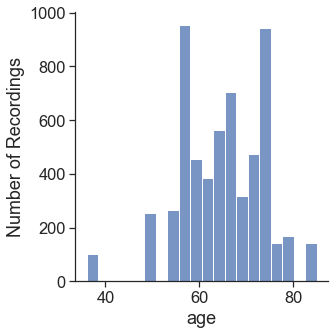

In [92]:
sns.displot(parkinsons['age'],bins=20)
plt.ylabel('Number of Recordings')

Average age in this dataset is roughly 64

In [93]:
parkinsons['age'].mean()

64.80493617021277

### Comparing noise to harmonics ratio vs harmonics to noise ratio

In [94]:
df = parkinsons[['NHR', 'HNR']]
df

,NHR,HNR
0,0.014290,21.640
1,0.005710,25.696
2,0.004805,26.264
3,0.017361,24.543
4,0.014919,27.530
...,...,...
5870,0.033013,24.559
5871,0.008689,23.567
5872,0.047796,23.239
5873,0.017788,25.860


In [95]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,NHR,HNR
count,5875.000000,5875.000000
mean,0.032120,21.679495
std,0.059692,4.291096
min,0.000286,1.659000
25%,0.010955,19.406000
50%,0.018448,21.920000
75%,0.031463,24.444000
max,0.748260,37.875000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


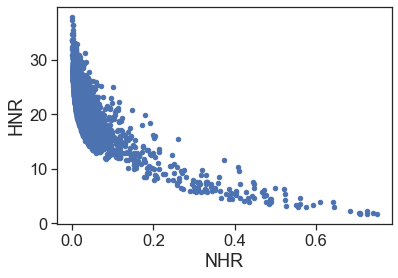

In [75]:
df.plot(kind='scatter', x='NHR', y='HNR')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x154e89ee0>,
      dtype=object)

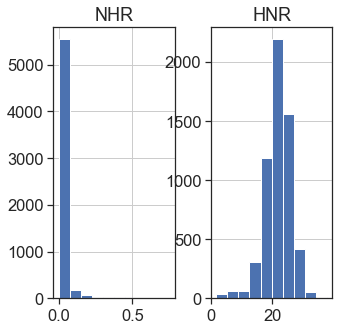

In [98]:
df.hist(bins=10,figsize =(5,5))

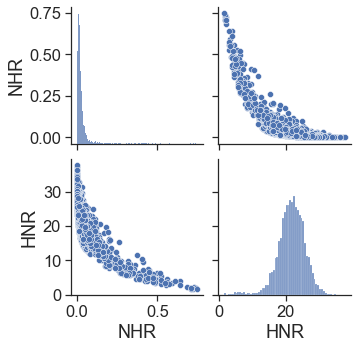

In [103]:
sns.pairplot(df)

### Comparing Sex with Jitter(%)

In [105]:
df2 = parkinsons[['sex', 'Jitter(%)']]
df2

,sex,Jitter(%)
0,0,0.00662
1,0,0.00296
2,0,0.00285
3,0,0.00547
4,0,0.00294
...,...,...
5870,0,0.00626
5871,0,0.00388
5872,0,0.00507
5873,0,0.00585


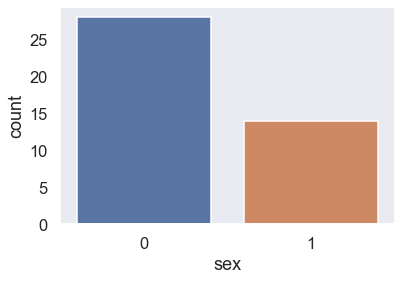

In [110]:
sns.countplot(x='sex',data=parkinsons.drop_duplicates('subject#'))

0 represents males and 1 represents females in this dataset. 

**jitter % by age & sex**

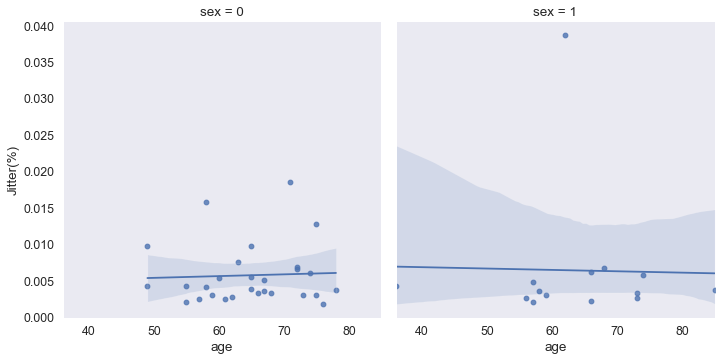

In [116]:
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='age',y='Jitter(%)',col='sex',data=parkinsons.drop_duplicates('subject#'))

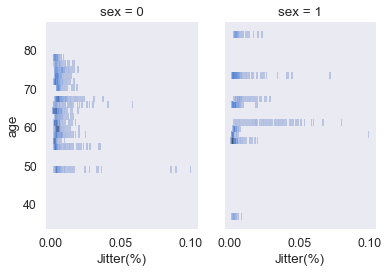

In [132]:
sns.displot(
    data=parkinsons, y="age", col="sex", x="Jitter(%)", height=4, aspect=.7,
)